In [157]:
#\-- IMPORT MODULES, CLASSES AND METHODS --/#

import zipfile                          #############################
import os                               # || FILE SYSTEM / UTILS || #
import copy                             #############################
from prettytable import PrettyTable
import copy

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
from sklearn.ensemble import IsolationForest
import numpy as np                  ###################################
import pandas as pd                 # || EXPLORATIVE DATA ANALYSIS || #
import matplotlib.pyplot as plt     ###################################
import seaborn as sns
import matplotlib
# https://towardsdatascience.com/handling-missing-data-like-a-pro-part-3-model-based-multiple-imputation-methods-bdfe85f93087 NumPyro, impyute,

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

import sklearn
import re
import importlib
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn import naive_bayes                         #########################
from sklearn import neural_network                      #  |-----------------|  #
from sklearn import svm                                 # || MODEL SELECTION || #
from sklearn import tree                                #  |-----------------|  #
from sklearn import linear_model                        #########################

# from PrunedCV import PrunedCV

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold     ##########################
from sklearn.model_selection import ParameterGrid       # || MODEL VALIDATION || #
                                                        ##########################
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline


from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import re
from datetime import datetime, timedelta

In [158]:
#\-- SET ENVIRONMENT --/#
# Before starting we need to store the data properly. We define an ad-hoc folder where we will store everything.
main_PATH = os.getcwd()

# We check whether we already have the data.                        
if 'data' not in os.listdir():                                      
                                                                    
    # Unzip files.
    with zipfile.ZipFile(r'summer_project_dataset.zip') as zip_ref:

        os.mkdir(main_PATH + '/data')   # We create the 'data' directory,
        os.chdir(main_PATH + '/data')   # we change directory,
    
        data_PATH = os.getcwd()         # we get the data path
        zip_ref.extractall(data_PATH)   # and we unzip there.       #####################
                                                                    # || FILE SYSTEM || #    
    file_PATH = data_PATH + '/summer_project_dataset'               #####################

else:

    # We just build the paths.
    data_PATH = main_PATH + '/data'
    file_PATH = data_PATH + '/summer_project_dataset'

# Finally, we go back to our main path.
os.chdir(main_PATH)

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# We also set a seed for reproducibility purposes.      #####################
SEED = 42                                               # || RANDOM SEED || #
np.random.seed(SEED)                                    #####################

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# LaTeX style plots.
plt.rcParams['figure.figsize'] = (12, 8)
# plt.rcParams['text.usetex']    = True         ############################
# plt.rcParams['font.family']    = 'serif'      # || DEFAULT PARAMETERS || #
# plt.rcParams['font.size']      = '10'         ############################

pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_rows', 10)

In [159]:
#\-- DATASET LOADING AND PREPROCESSING --/#
# Aome variables are stored as float, but they are actually int. Two reasons why:
#       -) nan values are considered as float --> first estimate them and then change the data type.
#       -) there are inconsistencies, especially in kw_max_min where some int values are float instead.
# for the moment just let's store everything as float, but further inspections are needed.

data_types = {
              'url' : str, 'timedelta' : int, 'shares' : int, 'data_channel' : str, 'weekday' : str, 
              
              'n_tokens_title'          : int, 'n_tokens_content'       : int, 'n_unique_tokens' : float, 'n_non_stop_words' : float,
              'n_non_stop_unique_tokens': float, 'average_token_length' : float,

              'num_hrefs' : int, 'num_self_hrefs' : int, 'num_imgs' : float, 'num_videos' : float,
              
              'kw_min_min' : float, 'kw_max_min' : float, 'kw_avg_min' : float, 'kw_min_max' : float, 'kw_max_max'   : float,
              'kw_avg_max' : float, 'kw_min_avg' : float, 'kw_max_avg' : float, 'kw_avg_avg' : float, 'num_keywords' : float,
              
              'self_reference_min_shares' : float, 'self_reference_max_shares' : float, 'self_reference_avg_sharess' : float,
              
              'LDA_00' : float, 'LDA_01' : float, 'LDA_02' : float, 'LDA_03' : float, 'LDA_04' : float,
              
              'global_subjectivity' : float, 'global_sentiment_polarity' : float, 'global_rate_positive_words' : float, 'global_rate_negative_words' : float,
              
              'rate_positive_words' : float, 'rate_negative_words' : float,
              
              'avg_positive_polarity' : float, 'min_positive_polarity' : float, 'max_positive_polarity' : float, 'avg_negative_polarity' : float,
              'min_negative_polarity' : float, 'max_negative_polarity' : float,

              'title_subjectivity' : float, 'title_sentiment_polarity' : float, 'abs_title_subjectivity' : float, 'abs_title_sentiment_polarity' : float,
              }                                                    
                                                                   
                                                                   
df = pd.read_csv(file_PATH + r'/development.csv',                 
                   usecols = lambda column: column != 'id', dtype = data_types)              
df


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,http://mashable.com/2014/09/08/safest-cabbies-...,121,12,1015,0.422018,1.0,0.545031,10,6,33.0,...,-0.160714,-0.500000,-0.071429,0.000000,0.000,0.500000,0.000,2900,bus,tuesday
1,http://mashable.com/2013/07/25/3d-printed-rifle/,532,9,503,0.569697,1.0,0.737542,9,0,NaN,...,-0.157500,-0.250000,-0.100000,0.000000,0.000,0.500000,0.000,1300,tech,thursday
2,http://mashable.com/2013/10/30/digital-dinosau...,435,9,232,0.646018,1.0,0.748428,12,3,4.0,...,-0.427500,-1.000000,-0.187500,0.000000,0.000,0.500000,0.000,17700,lifestyle,wednesday
3,http://mashable.com/2014/08/27/homer-simpson-i...,134,12,171,0.722892,1.0,0.867925,9,5,0.0,...,-0.216667,-0.250000,-0.166667,0.400000,-0.250,0.100000,0.250,1500,bus,wednesday
4,http://mashable.com/2013/01/10/creepy-robotic-...,728,11,286,0.652632,1.0,0.800000,5,2,NaN,...,-0.251786,-0.500000,-0.100000,0.200000,-0.100,0.300000,0.100,1400,tech,thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,http://mashable.com/2014/11/30/star-wars-guard...,37,11,440,0.564103,1.0,0.718978,10,2,NaN,...,-0.209167,-0.316667,-0.050000,0.000000,0.000,0.500000,0.000,1000,world,tuesday
31711,http://mashable.com/2014/11/14/uk-floods/,52,14,0,0.000000,0.0,0.000000,0,0,0.0,...,0.000000,0.000000,0.000000,0.666667,-0.700,0.166667,0.700,11000,lifestyle,monday
31712,http://mashable.com/2014/09/08/paypal-bitcoin-...,121,9,969,0.489583,1.0,0.710623,6,5,2.0,...,-0.400000,-1.000000,-0.050000,0.000000,0.000,0.500000,0.000,2400,tech,tuesday
31713,http://mashable.com/2013/08/23/mashable-androi...,503,11,1976,0.412308,1.0,0.621080,21,3,1.0,...,-0.323413,-1.000000,-0.050000,0.700000,-0.400,0.200000,0.400,6000,lifestyle,friday



# Before isolation forest
* Discard n_tokens_content = 0.
* Discard -1 values.
* Discard all 0 values for kw_avg_min, kw_avg_avg, kw_avg_max --> keyword_behaviour.
* Drop kw_max_max, kw_max_min, kw_min_min, kw_max_max, kw_max_avg, kw_min_avg
* Drop n_non_stop_words, n_non_stop_unique_tokens (, n_tokens_content?).
* Drop self_reference_min_shares, self_reference_max_shares.
* Drop rate_positive_words, rate_negative_words.
* Drop abs_title_subjectivity, abs_title_sentiment_polarity.
* Drop URL.
* Fill imgs, videos, keywords.
* Encode weekdays into Weekend and Not Weekend.
* Make linear combination between avg, min, max positive/negative polarity (weighted average: 0.6, 0.2, 0.2 / 0.7, 0.15, 0.15).
* Make a combination between title_subjectivity, title_sentiment_polarity (title_subjectivity * title_sentiment_polarity)
* Make a combination between global_subjectivity, global_sentiment_polarity (global_subjectivity * global_sentiment_polarity)
* Find a way to combine the previous statistic (keyword_behaiour) with num_keywords.
* Try with/without timedelta.

# Apply isolation forest
* Give scores to samples and discard outliers over a certain threshold.

# After isolation forest
* Apply logarithm IF NECESSARY (analyze residuals and check whether a logarithm may be useful).

# Models
* Negative Binomial
* Log-normal
* Log and then simple regression
* Gamma

# Clustering
* Work on subgroups and cluster the news
1. Preprocess data
2. Work on a subset of features
3. Cluster them

# Binning
* Title subjectivity
* Title sentiment polarity

# Winsorizing
* Self reference


In [160]:
df['popular'] = np.where(df['shares'] > 20000, 1, 0)

In [161]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42, stratify = df['popular'])

In [162]:
from preprocessor import Preprocessing
from sklearn.preprocessing import RobustScaler
pre = Preprocessing(df_train)

In [ ]:
from sklearn.preprocessing import RobustScaler

# We remove -1 because not informative and outliers.
fig, ax = plt.subplots(2, 4, figsize = (12, 8))

combination = df_train['kw_avg_avg'] * 0.6 + df_train['kw_avg_min'] * 0.2 + df_train['kw_avg_max'] * 0.2

_ = ax[0, 0].hist(df_train['kw_avg_min'], bins = 500)
_ = ax[0, 1].hist(df_train['kw_avg_avg'], bins = 500)
_ = ax[0, 2].hist(df_train['kw_avg_max'], bins = 500)
_ = ax[0, 3].hist(combination, bins = 500)

_ = ax[1, 0].boxplot(df_train['kw_avg_min'], vert = False)
_ = ax[1, 1].boxplot(df_train['kw_avg_avg'], vert = False)
_ = ax[1, 2].boxplot(df_train['kw_avg_max'], vert = False)
_ = ax[1, 3].boxplot(combination, vert = False)


In [ ]:
# We remove -1 because not informative and outliers.
fig, ax = plt.subplots(2, 4, figsize = (12, 8))

combination = df_train['avg_positive_polarity'] * 0.6 + df_train['max_positive_polarity'] * 0.2 + df_train['min_positive_polarity'] * 0.2

_ = ax[0, 0].hist(df_train['min_positive_polarity'], bins = 100)
_ = ax[0, 1].hist(df_train['avg_positive_polarity'], bins = 100)
_ = ax[0, 2].hist(df_train['max_positive_polarity'], bins = 100)
_ = ax[0, 3].hist(combination, bins = 500)

_ = ax[1, 0].boxplot(df_train['min_positive_polarity'], vert = False)
_ = ax[1, 1].boxplot(df_train['avg_positive_polarity'], vert = False)
_ = ax[1, 2].boxplot(df_train['max_positive_polarity'], vert = False)
_ = ax[1, 3].boxplot(combination, vert = False)

In [ ]:
# Test whether to keep combination or not.
fig, ax = plt.subplots(2, 4, figsize = (12, 8))

combination = np.log1p(df_train['self_reference_avg_sharess']) * 0.6 + np.log1p(df_train['self_reference_min_shares']) * 0.2 + np.log1p(df_train['self_reference_max_shares']) * 0.2

_ = ax[0, 0].hist(np.log1p(df_train['self_reference_min_shares']), bins = 100)
_ = ax[0, 1].hist(np.log1p(df_train['self_reference_avg_sharess']), bins = 100)
_ = ax[0, 2].hist(np.log1p(df_train['self_reference_max_shares']), bins = 100)
_ = ax[0, 3].hist(combination, bins = 500)

_ = ax[1, 0].boxplot(np.log1p(df_train['self_reference_min_shares']), vert = False)
_ = ax[1, 1].boxplot(np.log1p(df_train['self_reference_avg_sharess']), vert = False)
_ = ax[1, 2].boxplot(np.log1p(df_train['self_reference_max_shares']), vert = False)
_ = ax[1, 3].boxplot(combination, vert = False)


In [ ]:
# Test whether to keep combination or not.
fig, ax = plt.subplots(2, 4, figsize = (12, 8))

combination = df_train['avg_positive_polarity'] * 0.6 + df_train['min_positive_polarity'] * 0.2 + df_train['max_positive_polarity'] * 0.2

_ = ax[0, 0].hist(df_train['min_positive_polarity'], bins = 100)
_ = ax[0, 1].hist(df_train['avg_positive_polarity'], bins = 100)
_ = ax[0, 2].hist(df_train['max_positive_polarity'], bins = 100)
_ = ax[0, 3].hist(combination, bins = 500)

_ = ax[1, 0].boxplot(np.log1p(df_train['min_positive_polarity']), vert = False)
_ = ax[1, 1].boxplot(np.log1p(df_train['avg_positive_polarity']), vert = False)
_ = ax[1, 2].boxplot(np.log1p(df_train['max_positive_polarity']), vert = False)
_ = ax[1, 3].boxplot(combination, vert = False)

In [ ]:
# TODO APPLY BINNING AND IMPLEMENT IT IN PREPROCESSOR
fig, ax = plt.subplots(1, 3, figsize = (12, 8))

combination = df_train['global_sentiment_polarity'] * 0.5 + df_train['global_subjectivity'] * 0.5

_ = ax[0].hist(df_train['global_sentiment_polarity'], bins = 100)
_ = ax[1].hist(df_train['global_subjectivity'], bins = 100)
_ = ax[2].hist(combination, bins = 100)

In [ ]:
# Test whether to keep combination or not.
fig, ax = plt.subplots(2, 4, figsize = (12, 8))

# 'average_token_length',

#TODO REMOVE OUTLIERS, APPLY LOG AND STANDARDIZE

_ = ax[0, 0].hist(df_train[df_train['num_imgs'] < 20]['num_imgs'], bins = 100)
_ = ax[0, 1].hist(df_train[df_train['num_videos'] < 20]['num_videos'], bins = 100)
_ = ax[0, 2].hist(df_train['num_keywords'], bins = 100)
_ = ax[0, 3].hist(combination, bins = 500)

_ = ax[1, 0].boxplot(np.log1p(df_train['num_imgs']), vert = False)
_ = ax[1, 1].boxplot(np.log1p(df_train['num_videos']), vert = False)
_ = ax[1, 2].boxplot(np.log1p(df_train['num_keywords']), vert = False)
_ = ax[1, 3].boxplot(combination, vert = False)

In [163]:
discard_zeros = ['n_tokens_content']

for feature in discard_zeros:

    _ = pre.discard_zeros(feature)

_ = pre.apply_log('n_tokens_content')
_ = pre.robust_scale(discard_zeros, train = True)

_ = pre.robust_scale(['n_unique_tokens'])

discard_negative = ['kw_avg_min', 'kw_avg_avg', 'kw_avg_max']

for feature in discard_negative:

    _ = pre.discard_negatives(feature, include_zeros = False)

_ = pre.robust_scale(['n_tokens_title'])
_ = pre.robust_scale(['average_token_length'])
_ = pre.robust_scale(['num_keywords'])

drop_columns = ['n_non_stop_words', 'n_non_stop_unique_tokens', 'rate_positive_words', 'global_rate_positive_words', 'global_rate_negative_words',
                'rate_negative_words', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'url']

_ = pre.drop(drop_columns)



drop_kw = ['kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_min_avg', 'kw_max_avg']

_ = pre.drop(drop_kw)

_ = pre.robust_scale(['timedelta'])

# drop_tokens = ['n_tokens_content']
# _ = pre.drop(drop_tokens)


img_mean, videos_mean, key_mean = pre.fill_nan(columns = ['num_imgs', 'num_videos', 'num_keywords'], train = True)
# pre.fill_nan(imgs_mean = img_mean, videos_mean = videos_mean, key_mean = key_mean, columns = ['num_imgs', 'num_videos', 'num_keywords'], train = False)

_ = pre.filter('num_imgs', 12)
_ = pre.filter('num_videos', 5)

_ = pre.encode_weekdays()

_ = pre.apply_log1p(['num_imgs', 'num_videos'])
_ = pre.robust_scale(['num_imgs', 'num_videos'])

weights = {
    'self_reference_min_shares' : 0.2,
    'self_reference_avg_sharess' : 0.6,
    'self_reference_max_shares' : 0.2
}

pre.apply_log1p(list(weights.keys()))
pre.make_combination(weights, 'self_reference')
pre.robust_scale(['self_reference'])


weights_positive_polarity = {
    'min_positive_polarity' : 0.2,
    'avg_positive_polarity' : 0.6,
    'max_positive_polarity' : 0.2
}

weights_negative_polarity  = {
    'min_negative_polarity' : 0.2,
    'avg_negative_polarity' : 0.6,
    'max_negative_polarity' : 0.2
}


_ = pre.make_combination(weights_positive_polarity, 'positive_polarity', drop = True)
_ = pre.make_combination(weights_negative_polarity, 'negative_polarity', drop = True)
_ = pre.robust_scale(['positive_polarity', 'negative_polarity'])



weights = {
    'kw_avg_min' : 0.2,
    'kw_avg_avg' : 0.6,
    'kw_avg_max' : 0.2
}

_ = pre.apply_log1p(discard_negative)
_ = pre.robust_scale(discard_negative)
_ = pre.make_combination(weights, name_combination = 'keyword_behaviour', drop = True)


_ = pre.apply_one_hot(column = 'data_channel')
_ = pre.apply_one_hot(column = 'weekday')

_ = pre.apply_log1p(['num_hrefs', 'num_self_hrefs'])
_ = pre.robust_scale(['num_hrefs', 'num_self_hrefs'])

drop_columns = ['popular']

_ = pre.drop(drop_columns)

_= pre.robust_scale(['global_subjectivity', 'global_sentiment_polarity'])

# drop_columns = ['n_non_stop_words',
#  'kw_min_min',
#  'kw_max_max',
#  'abs_title_subjectivity',
#  'min_negative_polarity',
#  'bus',
#  'lifestyle',
#  'max_positive_polarity',
#  'num_videos',
#  'rate_positive_words',
#  'rate_negative_words',
#  'min_positive_polarity',
#  'n_tokens_title',
#  'max_negative_polarity',
#  'abs_title_sentiment_polarity',
#  'title_subjectivity',
#  'world',
#  'global_rate_negative_words',
#  'num_self_hrefs',
#  'kw_max_min',
#  'title_sentiment_polarity',
#  'global_rate_positive_words',
#  'avg_negative_polarity',
#  'num_keywords',
#  'num_imgs',
#  'LDA_03',
#  'LDA_00',
#  'average_token_length',
#  'kw_avg_min',
#  'kw_min_max']

# _ = pre.drop(drop_columns)


_ = pre.drop(['Not Weekend'])
# drop_columns = ['Not Weekend', 'LDA_02', 'LDA_00', 'LDA_04', 'LDA_01', 'LDA_03']
# _ = pre.drop(drop_columns)


_ = pre.apply_log(['shares'])

# log1p_features = ['num_self_href', 'num_href', ]
# log_features = ['num_self_href', 'num_href', 'kw_avg_max']

# pre.apply_log(log_features)

# robust_features = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
#        'num_hrefs',
#        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
#        'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
#        'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
#        'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
#        'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
#        'global_rate_positive_words', 'global_rate_negative_words',
#        'avg_positive_polarity',
#        'min_positive_polarity', 'max_positive_polarity',
#        'avg_negative_polarity', 'min_negative_polarity',
#        'max_negative_polarity', 'title_subjectivity',
#        'title_sentiment_polarity']

# pre.robust_scale(robust_features)


/home/mattizza/Documents/DSL-Online-News-Popularity/preprocessor.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__dataframe__[columns] = log_transformed_data
/home/mattizza/Documents/DSL-Online-News-Popularity/preprocessor.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__dataframe__[columns] = scaled_subset_data
/home/mattizza/Documents/DSL-Online-News-Popularity/preprocessor.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [164]:
df = pre.get_dataframe()

In [165]:
df.describe().iloc[:, 0:]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,LDA_04,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,self_reference,positive_polarity,negative_polarity,keyword_behaviour
count,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,...,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000
mean,0.029015,0.119209,-0.030545,0.077643,0.078667,0.110368,0.376809,0.463361,0.026038,0.077334,...,0.249523,0.000895,0.005619,0.270444,0.067501,7.443413,-0.650207,-0.035916,-0.021595,-0.028948
std,0.577518,0.706551,0.691126,0.750767,0.715058,0.720252,0.680038,0.524169,0.758719,0.562727,...,0.294651,0.818871,0.815547,0.317156,0.255806,0.898122,2.061514,0.737997,0.778579,0.665283
min,-0.934959,-2.333333,-3.064198,-2.842457,-2.176260,-1.198978,-0.679020,0.000000,-2.946171,-2.000000,...,0.018182,-4.227966,-4.455278,0.000000,-1.000000,2.079442,-4.914674,-3.364239,-4.399457,-4.047253
25%,-0.479675,-0.333333,-0.512495,-0.443662,-0.491887,-0.442507,0.000000,0.000000,-0.487303,-0.333333,...,0.028596,-0.505906,-0.498985,0.000000,0.000000,6.844815,-0.494551,-0.539570,-0.503616,-0.399053
50%,0.000000,0.000000,-0.049898,0.044094,0.000000,0.000000,0.000000,0.000000,0.007134,0.085873,...,0.050001,0.000000,0.000000,0.100000,0.000000,7.244228,0.000000,0.000000,0.000000,-0.044846
75%,0.542005,0.666667,0.462992,0.545812,0.508113,0.557493,1.000000,1.000000,0.507374,0.333333,...,0.441255,0.494094,0.501015,0.500000,0.136364,7.901007,0.505449,0.460430,0.496384,0.354315
max,1.021680,3.333333,2.837648,3.430986,3.810389,3.512942,1.833654,2.170867,5.879017,1.000000,...,0.927119,5.098430,5.232488,1.000000,1.000000,13.389179,3.851292,5.198452,1.720344,5.231789


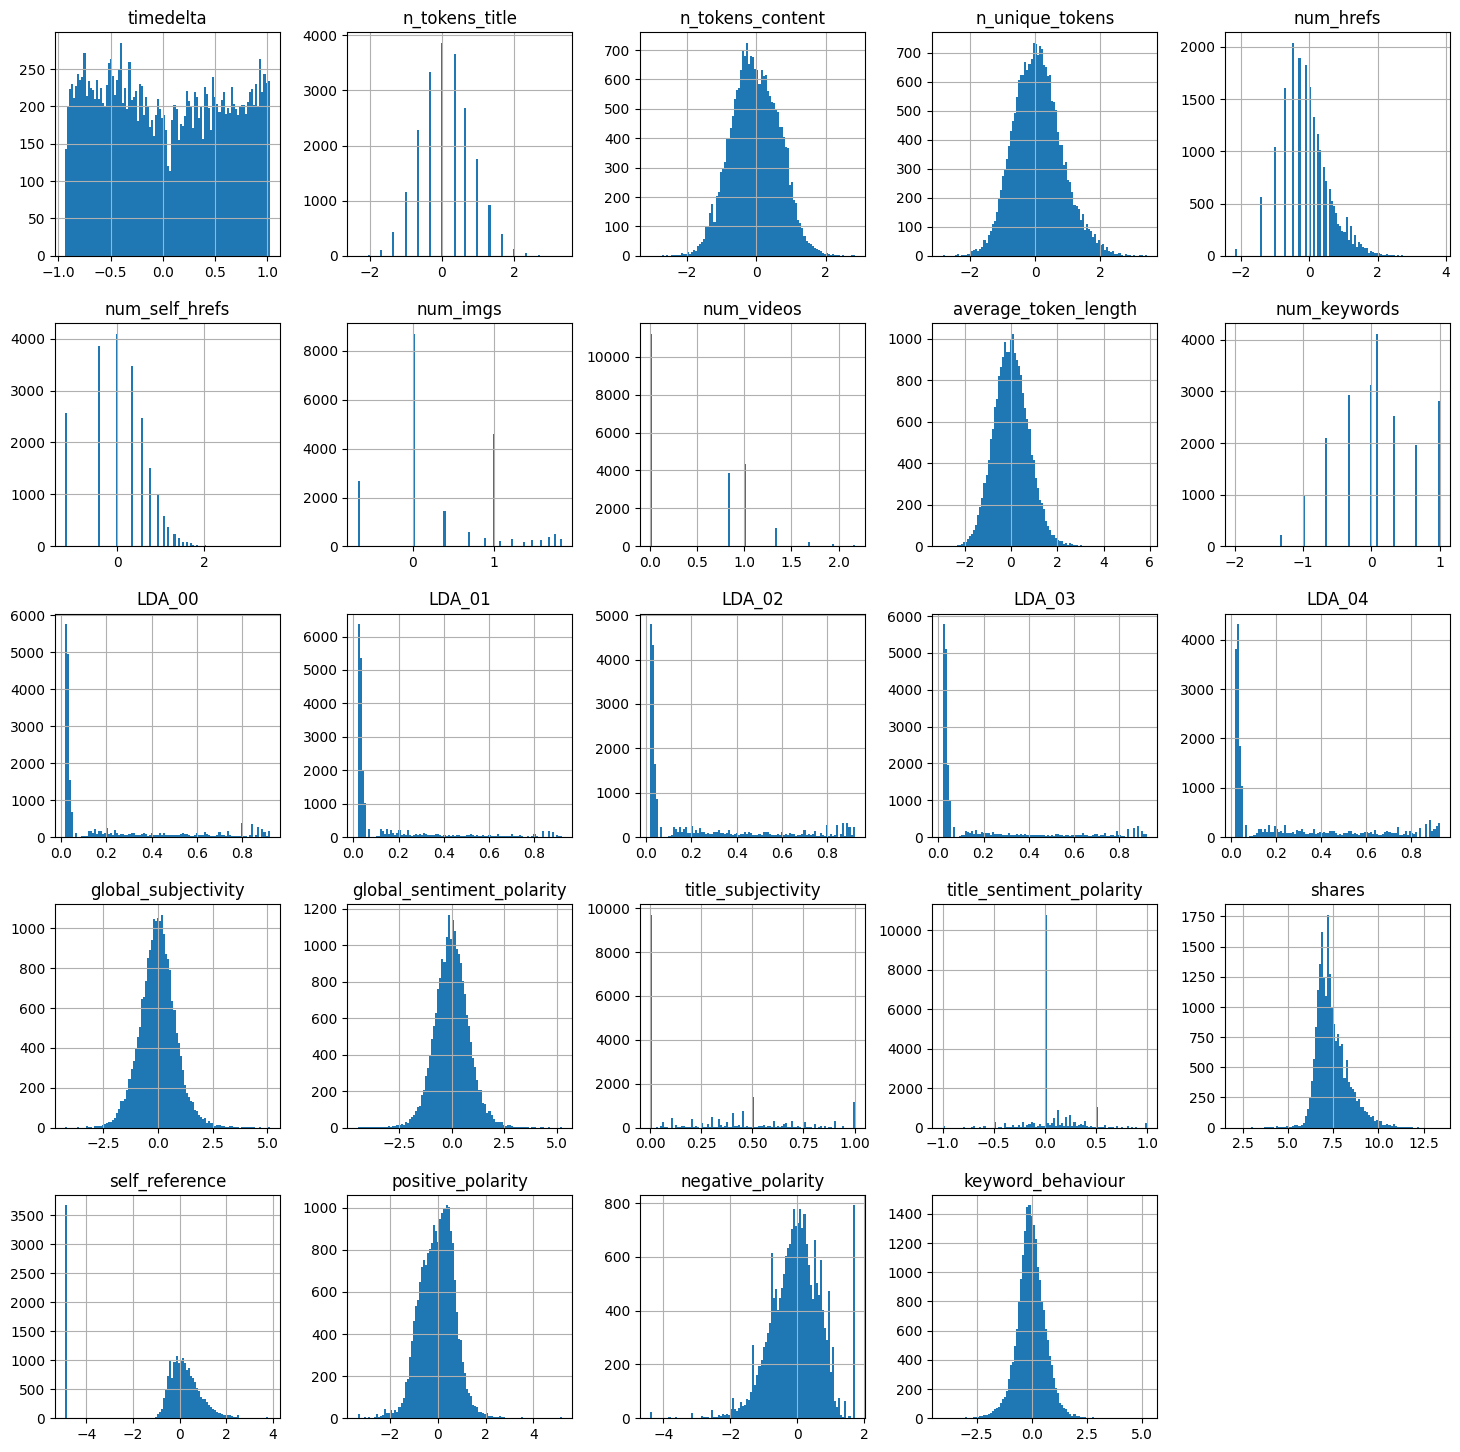

In [166]:
_ = df.hist(figsize = (18, 18), bins = 100)

Text(0.5, 1.0, 'Scree plot')

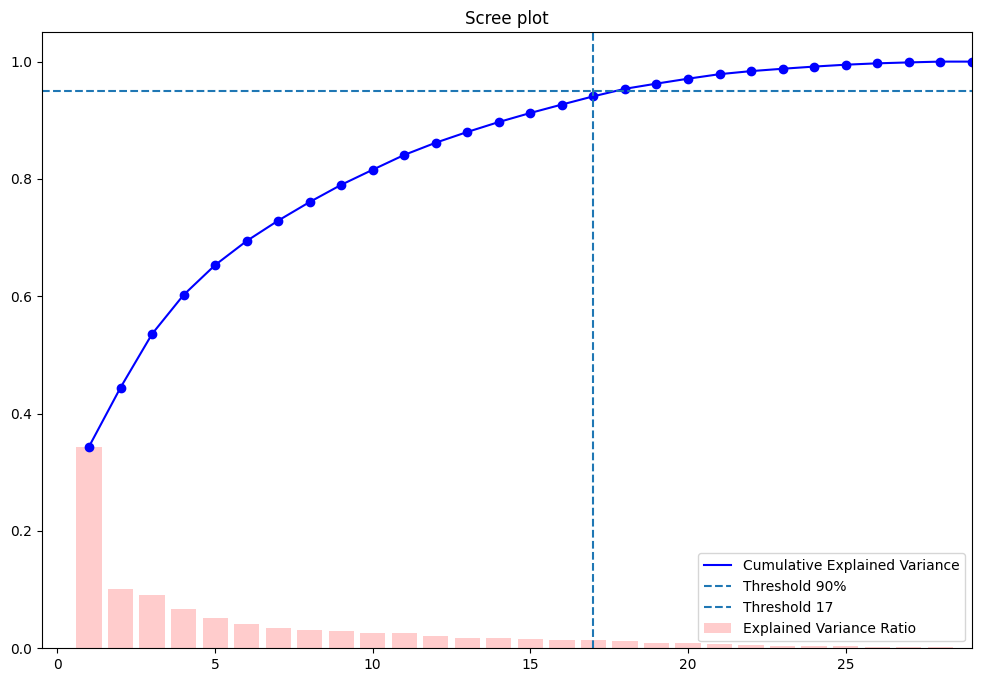

In [169]:
p = PCA()
temp = copy.deepcopy(df.drop('shares', axis = 1))
# temp = copy.deepcopy(df.drop(['shares', 'url', 'popular'], axis = 1))
p.fit(temp)
cum = np.cumsum(p.explained_variance_ratio_)

fig, ax = plt.subplots(1, 1)
ax.bar(np.arange(1, temp.shape[1] +1, 1), p.explained_variance_ratio_, alpha = 0.2, color = 'red', label = 'Explained Variance Ratio')
ax.plot(np.arange(1, temp.shape[1] +1, 1), cum, c = 'blue', label = 'Cumulative Explained Variance')
ax.scatter(np.arange(1, temp.shape[1] +1, 1), cum, c = 'blue')
ax.set_xlim(-0.5, df.shape[1] - 2)
ax.axhline(y = 0.95, linestyle = '--', label = 'Threshold 90%')
ax.axvline(x = 17, linestyle = '--', label = 'Threshold 17')
ax.legend()
ax.set_title('Scree plot')

In [170]:
reduced_df = p.transform(temp)

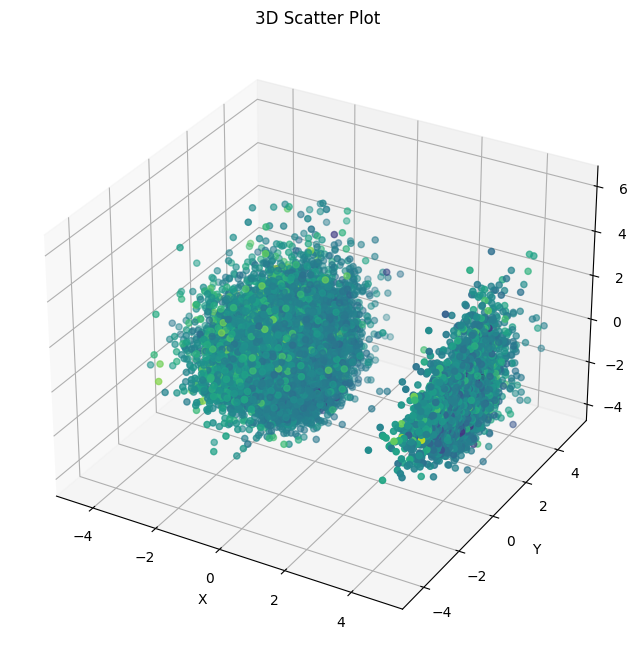

In [179]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c = df['shares'])

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

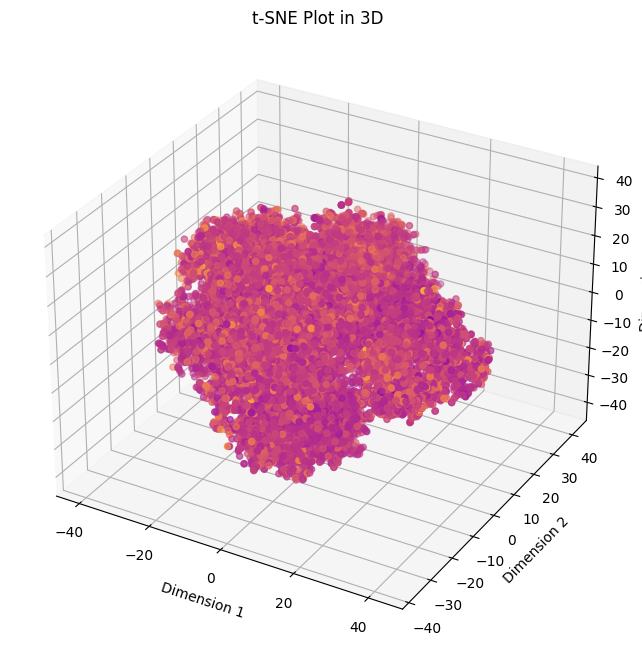

In [182]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Assuming you have your original data stored in X, with shape (n_samples, n_features)

# Create a t-SNE instance and specify the desired number of components (in this case, 3)
tsne = TSNE(n_components = 3)

# Apply t-SNE to reduce the dimensionality of your data
X_tsne = tsne.fit_transform(temp)

# Create a 3D scatter plot of the reduced data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c = df['shares'], cmap = 'plasma')

# Set labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('t-SNE Plot in 3D')

# Show the plot
plt.show()


In [215]:

class KMeans:
    
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
    
    def __plot_clusters(self, X, labels, c=None):
        fig, ax = plt.subplots(figsize=(6,6), dpi=90)
        ax.scatter(X[:,0], X[:,1], c=labels, cmap='Set3')
        if c is not None: 
            ax.scatter(c[:,0], c[:,1], marker="*", color="red")
        
        return fig, ax
    
    def __init_random_centroids(self, X):
        c_idx = np.random.randint(0, X.shape[0], self.n_clusters)
        c = X[c_idx] # fancy-indexing
        return c

    def fit_predict(self, X, plot_clusters = False, plot_steps = 5):
        """Run the K-means clustering on X.
        
        :param X: input data points, array, shape = (N,C).
        :return: labels : array, shape = N.
        """
        # For each point, store the positional index of the closest centroid
        nearest = np.empty(X.shape[0])
        
        c_out = self.__init_random_centroids(X)
        for j in range(self.max_iter):
            nearest_prev = nearest

            # For each point in X, compute the squared distance from each centroid
            # dist will have shape: (n_clusters, X.shape[0])
            dist = np.array([np.sum((X-c_out[i])**2, axis=1) for i in range(self.n_clusters)])

            # Find the nearest centroid for each point using argmin
            # nearest will have shape: (X.shape[0],)
            nearest = dist.argmin(axis=0)

            if plot_clusters and (j % plot_steps == 0):
                fig, ax = self.__plot_clusters(X, nearest, c_out)
                ax.set_title(f"Iteration {j}")
            
            # Early stopping if centroids have not changed 
            if np.array_equal(nearest, nearest_prev):
                print(f"Early stopping at iteration {j}!")
                break

            # For each cluster, compute the average coordinates considering only points currently
            # assigned to it. Then, use them as the new centroid coordinates.
            for i in range(self.n_clusters):
                c_temp = X[nearest == i].mean(axis=0) # indexing with a mask 
                if not np.isnan(c_temp).any(): # handle the case of an empty cluster
                    c_out[i] = c_temp
            
        self.centroids = c_out
        self.labels = nearest
        return self.labels
    
    def dump_to_file(self, filename):
        """Dump the evaluated labels to a CSV file."""
        with open(filename, 'w') as fp:
            fp.write('Id,ClusterId\n')
            for i, label in enumerate(self.labels):
                fp.write(f'{i},{label:d}\n')

def plot_centroids(X, c, title=None):
 
    fig, ax = plot_2d_scatter(X)
    ax.scatter(c[:,0], c[:,1], marker="*", color="red")

    if title:
        ax.set_title(title)
    return fig, ax


def plot_2d_scatter(X):
    """Display a 2D scatter plot

    :param X: input data points, array
    :return: fig, ax, objects
    """
    fig, ax = plt.subplots(figsize=(6, 6), dpi=90)
    ax.scatter(X[:,0], X[:,1])
    return fig, ax # use them for further modifications


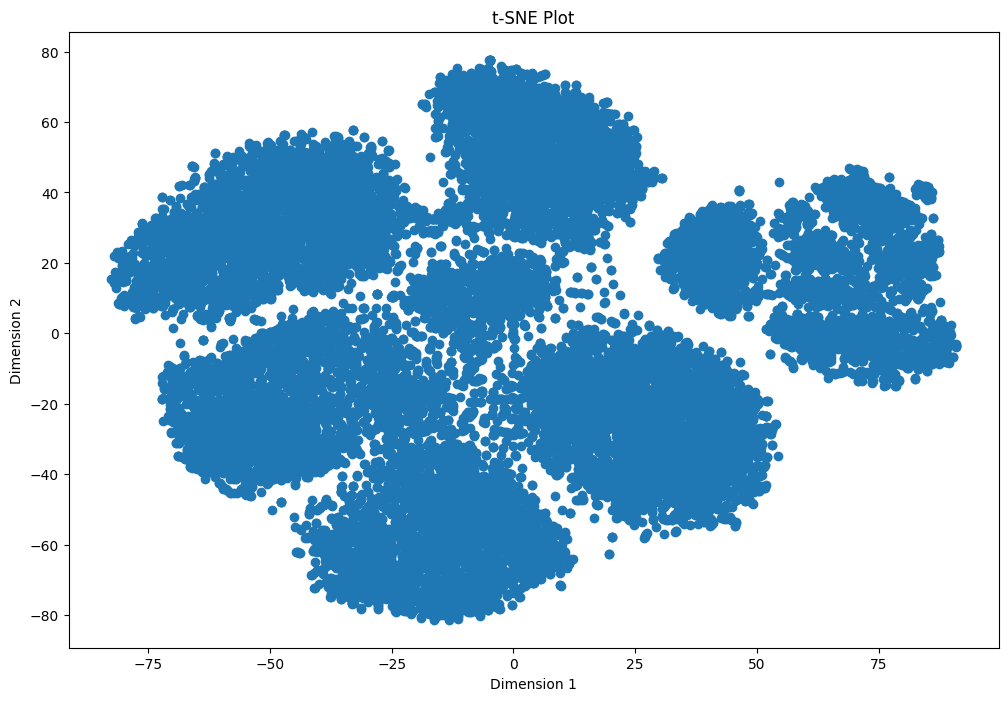

In [210]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming you have your original data stored in X, with shape (n_samples, n_features)

# Create a t-SNE instance and specify the desired number of components (in this case, 2)
tsne = TSNE(n_components = 2)

# Apply t-SNE to reduce the dimensionality of your data
X_tsne = tsne.fit_transform(temp)

# Create a scatter plot of the reduced data
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

# Set labels and title
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Plot')

# Show the plot
plt.show()

Early stopping at iteration 24!


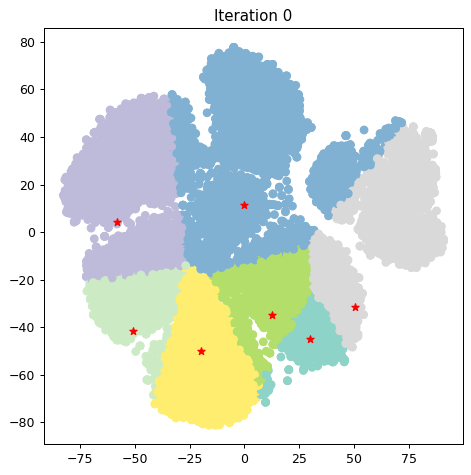

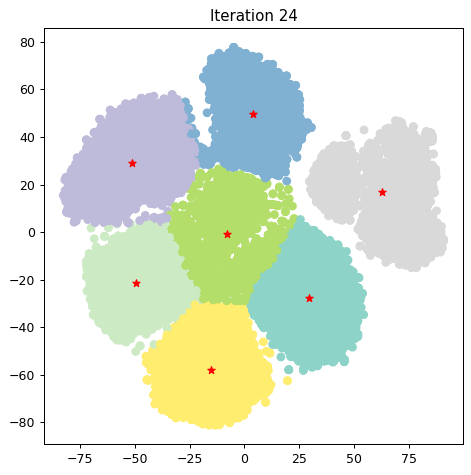

In [226]:
np.random.seed(0)
k_gauss = KMeans(7)

_ = k_gauss.fit_predict(X_tsne, True, 24)


In [227]:
def compute_a(x, x_label, X, labels):
    c_idx = np.where(labels == x_label) # we are including the point itself... 
    a = np.mean(np.linalg.norm(x - X[c_idx], axis=1)) # ...because this distance will be 0 when computed from itself.
    return a

def compute_b(x, x_label, X, labels):
    bs = []
    other_labels = np.unique(labels[labels != x_label]) # array with all cluster Ids different from the current one

    for ol in other_labels:
        c_idx = np.where(labels == ol)
        b = np.mean(np.linalg.norm(x - X[c_idx], axis=1))
        bs.append((ol, b))

    neigh, b = min(bs, key=lambda x: x[1])
    return neigh, b

def silhouette_samples(X, labels):
    """Evaluate the silhouette for each point and return them as a list.
    
    :param X: input data points, array, shape = (N,C).
    :param labels: the list of cluster labels, shape = N. :return: silhouette : array, shape = N
    """
    silhouette = np.zeros(X.shape[0])
    for idx in range(X.shape[0]):
        x = X[idx]
        x_label = labels[idx]

        # compute a
        a = compute_a(x, x_label, X, labels)
        # compute b
        _, b = compute_b(x, x_label, X, labels)

        silhouette[idx] = (b - a) / np.max([a, b])
        
    return silhouette

def silhouette_score(X, labels):
    """Evaluate the silhouette for each point and return the mean.
    
    :param X: input data points, array, shape = (N,C).
    :param labels: the list of cluster labels, shape = N. :return: silhouette : float
    """
    return np.mean(silhouette_samples(X, labels))



In [228]:
np.random.seed(6)
k_gauss = KMeans(7)


l_gauss = k_gauss.fit_predict(X_tsne)

sil_gauss = silhouette_score(X_tsne, l_gauss)

print('Gaussian clusters, average silhouette:', sil_gauss)



Early stopping at iteration 13!
Gaussian clusters, average silhouette: 0.42549435277844805


NameError: name 'sil_cham' is not defined

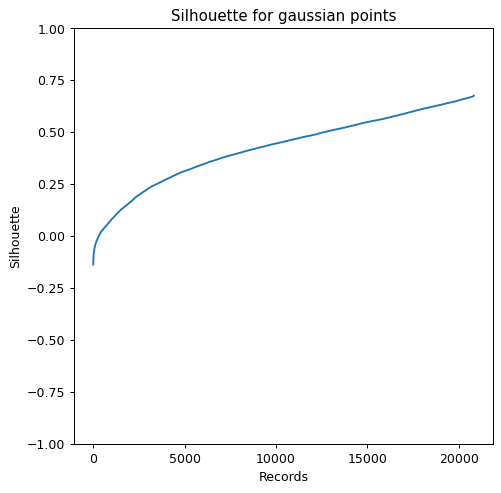

In [230]:
def plot_silhoeutte(silhouette, title=None):
    fig, ax = plt.subplots(figsize=(6,6), dpi=90)
    ax.plot(np.sort(silhouette))
    ax.set_ylabel("Silhouette")
    ax.set_ylim(-1,1)
    ax.set_xlabel("Records")
    if title:
        ax.set_title(title)
    return fig, ax

_, _ = plot_silhoeutte(silhouette_samples(X_tsne, l_gauss), "Silhouette for gaussian points")

Computing K:5
Early stopping at iteration 31!
Computing K:6
Early stopping at iteration 14!
Computing K:7
Early stopping at iteration 19!
Computing K:8
Early stopping at iteration 12!
Computing K:9
Early stopping at iteration 37!


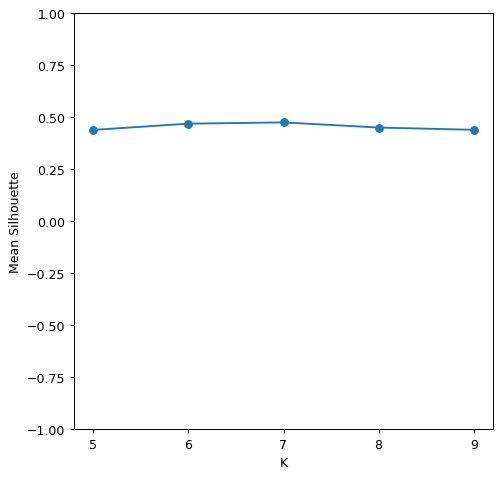

In [231]:
np.random.seed(6)
scores = []
K_values = list(range(5, 10))
for k in K_values:
    print(f"Computing K:{k}")
    kmeans_model = KMeans(k)
    labels = kmeans_model.fit_predict(X_tsne)
    scores.append(silhouette_score(X_tsne, labels))
    
fig, ax = plt.subplots(figsize=(6,6), dpi=90)
ax.plot(scores, marker="o")
ax.set_ylabel("Mean Silhouette")
ax.set_ylim(-1,1)

ax.set_xlabel("K")
ax.set_xticks(list(range(len(K_values))))
_ = ax.set_xticklabels(K_values)



In [236]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps = 0.4, min_samples = 10).fit(X_tsne)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 20730


In [239]:
# print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
# print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
# print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
# print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
# print(
#     "Adjusted Mutual Information:"
#     f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
# )
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_tsne, labels):.3f}")

Silhouette Coefficient: -0.501


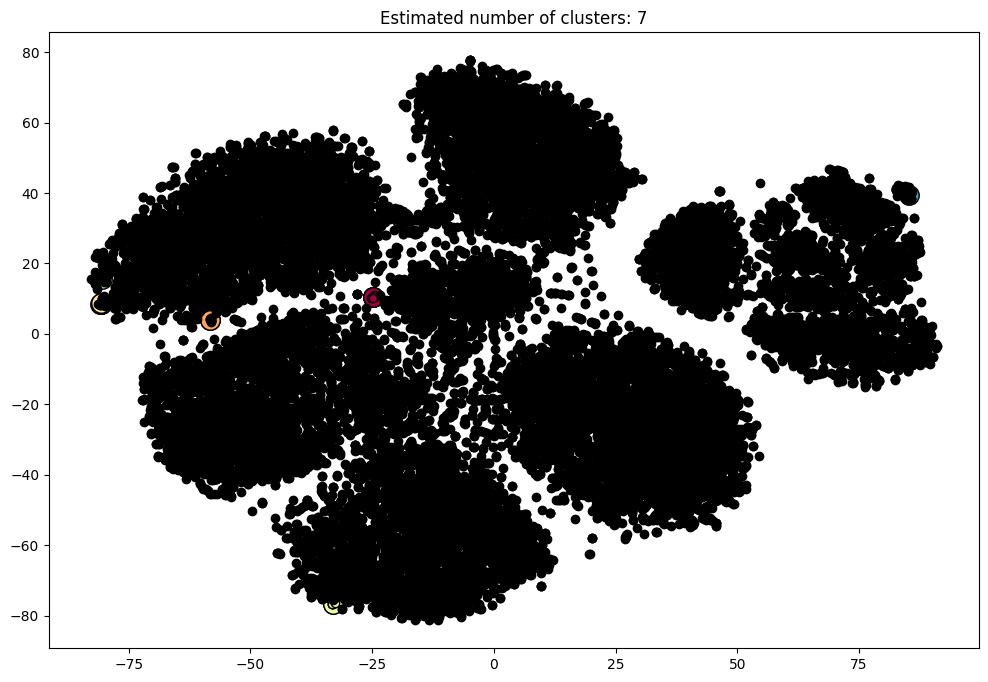

In [242]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_tsne[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_tsne[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


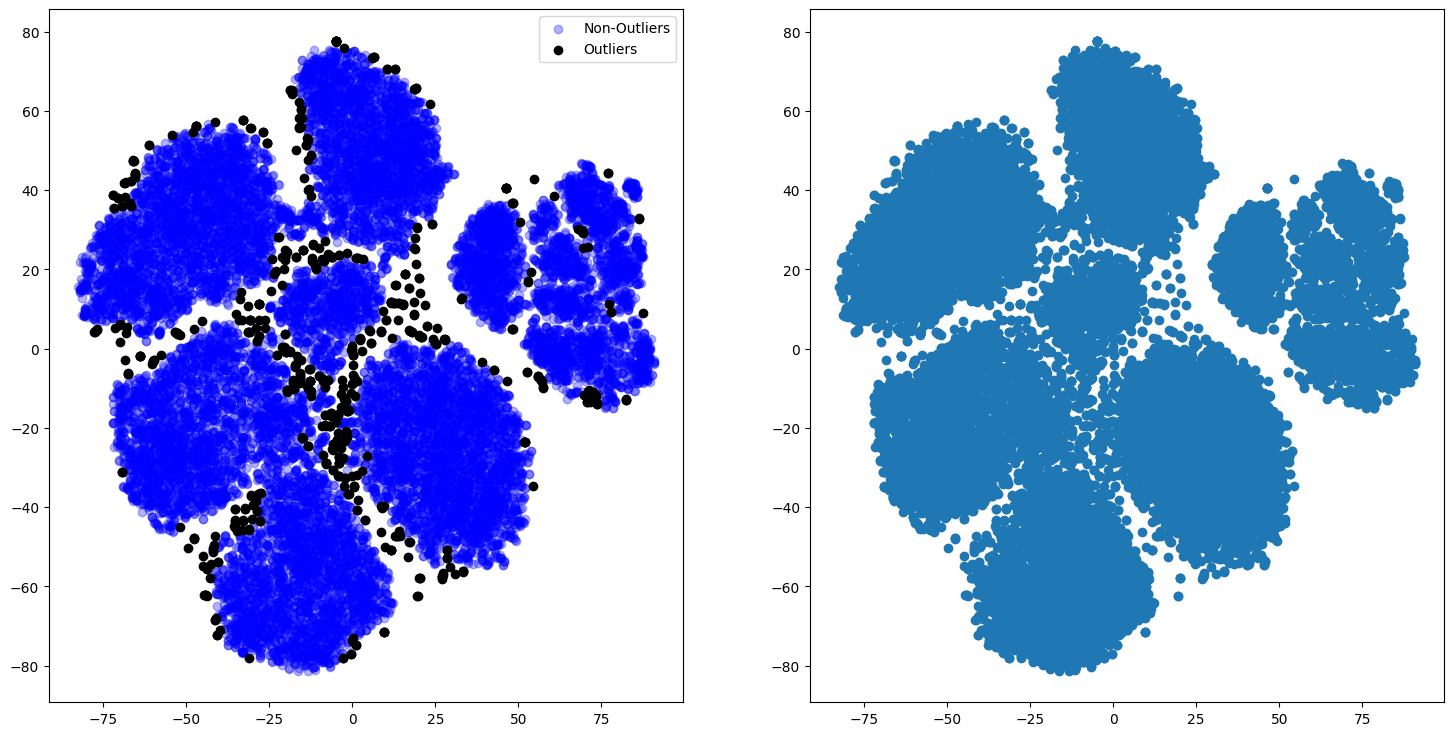

In [264]:
# Apply DBSCAN
epsilon = 2.2  # Distance threshold for defining neighborhood
min_samples = 13  # Minimum number of samples in a neighborhood
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(X_tsne)

# Separate outliers from non-outliers
outliers = X_tsne[labels == -1]
non_outliers = X_tsne[labels != -1]

fig, ax = plt.subplots(1, 2, figsize = (18, 9))

# Plot the results
ax[0].scatter(non_outliers[:, 0], non_outliers[:, 1], c='blue', label='Non-Outliers', alpha = 0.3)
ax[0].scatter(outliers[:, 0], outliers[:, 1], c='black', label='Outliers')
ax[0].legend()

ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1])


# Show the plot
plt.show()


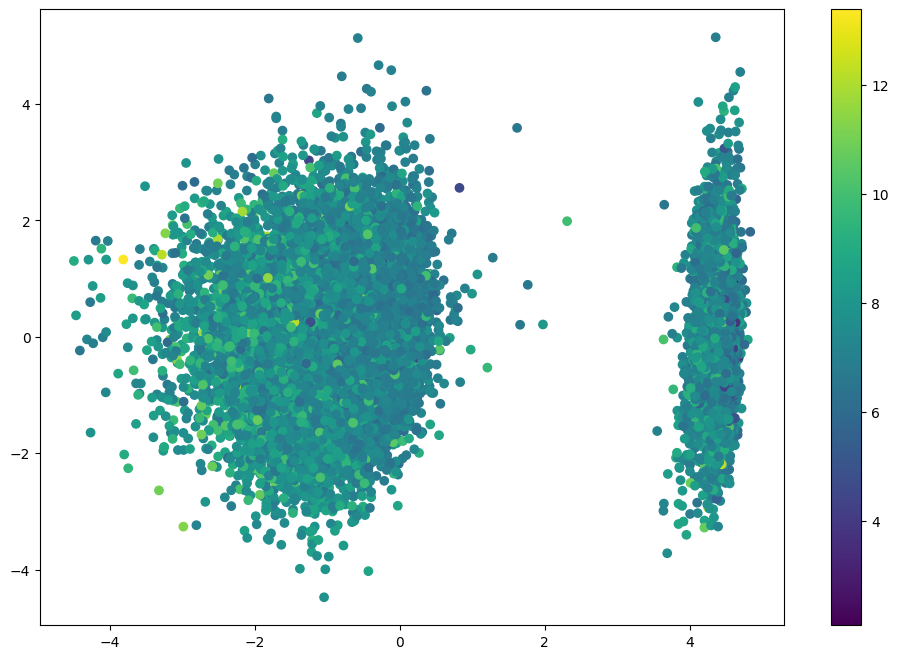

In [175]:
_ = plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c = df['shares'])
_ = plt.colorbar()

In [64]:
df = pre.get_dataframe()
# scores = pre.isolate()
# filtered_df_train = df[scores < 0.50]

In [11]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 500, max_depth = 5, max_features = 'sqrt')
regr.fit(df.drop('shares', axis = 1), np.log(df['shares']))

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=500)

In [12]:
pred = regr.predict(df.drop('shares', axis = 1))

In [13]:
np.sqrt(mean_squared_error(np.exp(pred), df['shares']))

9062.023900019685

In [72]:

sorted_lists = sorted(zip(regr.feature_importances_, regr.feature_names_in_))

sorted_list1 = [x[1] for x in sorted_lists]
sorted_list2 = [x[0] for x in sorted_lists]


# Most important features
* kw_avg_avg
* self_reference_avg_sharess
* kw_max_avg
* timedelta
* tech
* entertainment
* self_reference_min_shares
* num_hrefs
* kw_avg_max
* socmed
* kw_min_max
* n_tokens_content
* LDA_04
* LDA_02
* n_unique_tokens
* n_non_stop_unique_tokens
* global_subjectivity
* glo

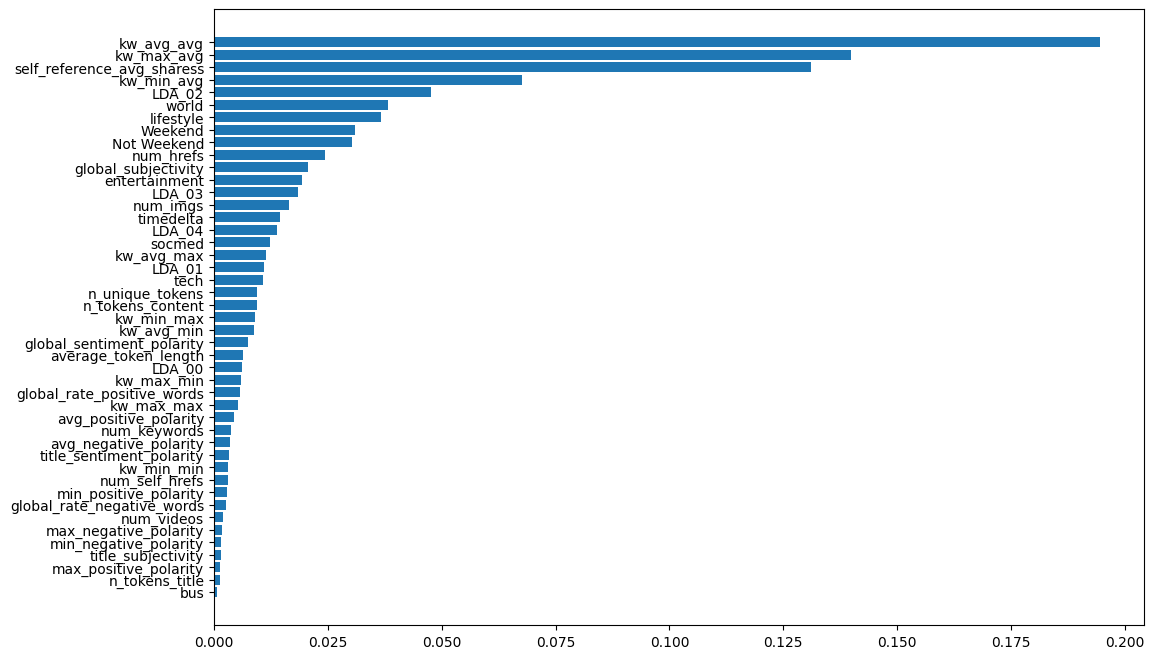

In [73]:
_ = plt.barh(y = sorted_list1, width = sorted_list2)

In [33]:
df_robust.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 

In [10]:
df = pre.get_dataframe()
filtered_df_test = copy.deepcopy(df)

In [13]:
filtered_df_test.shape, filtered_df_train.shape

((6010, 25), (23738, 25))

In [12]:
X_train = filtered_df_train.drop('shares', axis = 1)
y_train = filtered_df_train['shares']
X_test = filtered_df_test.drop('shares', axis = 1)
y_test = filtered_df_test['shares']

In [15]:
from sklearn.model_selection import KFold
from Pruned import PrunedCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import xgboost as xgb

#\-- A BIT OF TUNING AND THEN SELECTION --/#

# We first define the grid of parameters. We need to specify both the values AND the name of the classifier because it will be of use
# when picking the right ones.
# param_grid = {

#     'sklearn.ensemble.GradientBoostingRegressor': {                            # Here we specify only the SVM, but there should be a lot of other configurations.
#                 'learning_rate': [0.05, 0.1, 0.15],
#                 'n_estimator': [100, 300, 500, 1000, 2000],
#                 'min_samples_leaf' : [5, 15, 20],
#                 'min_weight_fraction_leaf' : [0.0, 0.1, 0.2],
#                 'max_depth' : [2, 3, 4, 5],
#                 'subsample' : [0.5, 0.75, 1.0],
#                 'min_samples_split' : [2, 5, 10, 20],
#                 'max_features' : ['auto', 'sqrt', 'log2']           
#                }                                     
             
#              }

param_grid = {

    'sklearn.ensemble.RandomForestRegressor': {      
        
        'n_estimators'    : [500, 1000, 1500],
        'max_depth'    : [5, 6, 7],
        'min_samples_split'     : [10, 50, 100],
        'min_samples_leaf'         : [10, 50, 100]
               },
    
                                      
             
             }

scores      = [mean_squared_error] # List of scores we want to compute, e.g. accuracy_score, f1_score, ... They must be methods.
MAIN_SCORE = 'mean_squared_error'

# Create a StratifiedKFold object for Cross Validation and perform the train/test split.
skf = KFold(n_splits = 5, shuffle = True, random_state = SEED)


# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Start the Cross Validation. In this first step we simply try some configurations and try to tune the models the best we can.
# Notice that this phase should take not much time, but given the amount of possible configurations it is likely to be quite expensive.
# However, we are sure that at the end we will get a fair comparison between every model. 
# This will be called Cross-VSV (Validation-Selection-Validation) or Cross-SeleDation (Selection-Validation).


In [16]:
# p = PCA()
# temp = copy.deepcopy(X_train)
# p.fit(temp)

cross_validator = PrunedCV(X_train, y_train, skf)


cross_validator.set_params(param_grid, scores)
cross_validator.set_evaluation(mean_squared_error, 3, 1.20)
toc = time.time()
cross_validator.do_cross_validation(verbose = 4)


# At the end we will have a fair comparison between models. We can store additional information regarding the Standard Deviation as well.

# Consider using PrettyTable() to visualize the results.
# t = PrettyTable()
# t.field_names = ['Model', 'Accuracy', 'F1']
# t.add_row([name, accuracy, f1])

# print(t)

tic = time.time()
print(tic - toc)
# CONSIDER TO PRUNE THE SEARCH IF THE RESULTS DON'T IMPROVE MUCH.
# Example: if the best result with one model is 0.95 and another configuration of the same model is stuck near 0.90, just don't
# wait for the end of the loop but go to the next model/configuration.


Model: sklearn.ensemble.RandomForestRegressor


	NEW CONFIGURATION

Configuration: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500}

Fold 1 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 11974.884989203094}
Highest average mean_squared_error: 20000
Fold 2 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 6919.8586608178575}
Highest average mean_squared_error: 20000
Fold 3 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 7746.580875529218}
Highest average mean_squared_error: 20000
Fold 4 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 14375.221102657499}
Highest average mean_squared_error: 20000
Fold 5 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 11233.361585599658}
Highest average mean_squared_error: 20000

	NEW CONFIGURATION

Configuration: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 1000}

Fold 1 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 11976.26778332579}
Highest average mean_squared_error

KeyboardInterrupt: 